# Project: Investigate a Dataset (Medical Appointment No-Shows)

## Table of Contents
<ul>
<li><a href="#intro">1.Introduction</a></li>
<li><a href="#wrangling">2.Data Wrangling</a></li>
<li><a href="#eda">3.Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4.Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
### This Project:

**By:** Ahmed ElSawy (24,25,26/12/2021)

**Submitted to:** Udacity - egFWD initiative - Data Analysis Professional Track



### 1.1. Dataset: (Medical Appointment No-Shows)
This project includes five optional datasets to choose from. The dataset of choice collects information from medical appointments in Brazil and is focused on whether the person who made a doctor appointment, received all the instructions and failed to show up or not. So, the most important variable is whether the patient show-up or no-show to the appointment.
This dataset contains 110527 rows (medical appointments) and 14 columns (associated variables / characteristics).
### 1.2. Variables: (as is, i.e., typos kept from original dataset and will be handled during wrangling phase)
Variable Names (as is) | Description
:--: | :--
PatientId | Identification of a patient
AppointmentID | Identification of each appointment
Gender | Male or Female
ScheduledDay | The day someone called or registered the appointment, this is before appointment of course
AppointmentDay | The day of the actual appointment, when they have to visit the doctor
Age | How old is the patient
Neighbourhood | Where the appointment takes place, i.e., hospital location.
Scholarship | True of False. whether or not the patient is enrolled in Brazilian welfare program [Bolsa Família]( https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
Hipertension | True or False. whether or not the patient is hypertensive patient 
Diabetes | True or False. whether or not the patient is diabetic patient
Alcoholism | True or False. whether or not the patient is alcoholic
Handcap | True or False. whether or not the patient is handicapped
SMS_received | True or False. one or more messages sent to the patient
No-show | Yes or No. whether the patient failed to show up or not.

### 1.3. Research questions:
The most important variable is whether the patient show-up or no-show to the appointment. Imagine what if we could expect whether certain patient most likely to cancel his/her appointment or not. This potential prediction would be very beneficial to organize waiting lists of patients and save a lot of time wasted, which would have helped serve more customers. So, no-show analyses are of both economic and health benefits. Unfortunately, my perspective of analysis can not come out with those definite conclusions of no-show causations, but I tried to use my data analysis skills to figure out some trends and insights about the available data.

1. To what extent is the patient gender correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between gender and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Comparing percentages of male and female patients of total appointments.
        * Comparing percentages of absent and attendant patients of total appointments.
        * Comparing proportions of absence in males and females.


2. To what extent is the hospital location (neighborhood) correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between neighborhood and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring neighborhood distribution and descriptive statistics.
        * Exploring proportions of neighborhood absent (no show) and checking for outliers.
        * Outliers raise interesting questions for further investigations by other data analysts.


3. To what extent is the enrollment in Brazilian welfare program (scholarship) correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between enrollment in Brazilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia "Bolsa Família") (Portuguese; means _Family Allowance_) and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring percentages of patients enrollment in Brazilian welfare program of total appointments.
        * Exploring number of absent patients enrollment in Brazilian welfare program.


4. To what extent is the comorbid disease (hypertension) correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between hypertension and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring percentages of normal and hypertensive patients of total appointments.
        * Exploring percentages of absent normal and hypertensive patients.


5. To what extent is the comorbid disease (diabetes) correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between diabetes and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring percentages of normal and diabetic patients of total appointments.
        * Exploring percentages of absent normal and diabetic patients.


6. To what extent is the comorbid alcoholism correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between alcoholism and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring percentages of normal and alcoholic patients of total appointments.
        * Exploring percentages of absent normal and alcoholic patients.


7. To what extent is receiving all the instructions (sms received) correlated to no-show?
    * The answer of this question helps to find trends of correlation (if any) between sms and no-show.
    * And to draw general picture of the answer of this question I performed the following steps:
        * Exploring percentages of patients (whether received SMS or not) of total appointments.
        * Exploring percentages of absent Patients whether received SMS or not.

### 1.4. Analysis limitations:
I tried to figure out some factors affecting no-shows, based on the available data, using Python libraries NumPy and pandas and matplotlib where they are appropriate, knowing that there are limitations to this analysis, because even strong association is not a proof of causation. Besides, the patient may has any not-mentioned/unknown comorbidity. Also, the weather status and traffic status that we have no idea about it. And many other factors, like the physician and/or specialization are/is related or not.


In [1]:
# import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling


### 2.1. General Properties

#### 2.1.1. Loading data and print out a few lines.

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2.1.2. Inspecting data.
**Inspect: data types - missing data - duplicated data - erratic data - column names**

In [3]:
df.shape

(110527, 14)

In [4]:
# Inspect: data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Inspect: erratic data & column names
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [7]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [8]:
# find age records less than or equal zero (erratic)
df[df["Age"] <= 0].value_counts().sum()

3540

In [9]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [10]:
df.Neighbourhood.nunique()

81

In [11]:
df.Neighbourhood.value_counts().describe()

count      81.000000
mean     1364.530864
std      1369.199539
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Neighbourhood, dtype: float64

In [12]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

In [13]:
df.Hipertension.unique()

array([1, 0], dtype=int64)

In [14]:
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [15]:
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [16]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [17]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [18]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [19]:
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

Erratic data: 
 * minimum age equals -1& age equals 0. those make nonsense
 * handcap max is 4, makes nonsense, as it is supposed to be Boolean (0/1)

Column names:
 * typo detected, Hipertension, Handcap
 * lowercase and underscores would be rather preferred
 * some columns seem to be not very interesting as per analysis perspective, PatientId, AppointmentID, ScheduledDay,AppointmentDay 

In [20]:
# Inspect: missing data
df.isnull().any().sum()

0

No missing data, i.e., no nulls

In [21]:
# Inspect: duplicated data
df.duplicated().any().sum()

0

No duplicated data

### 2.2. Data Cleaning (drop unnecessary columns, rename columns and drop erratic data)

#### 2.2.A. Drop unnecessary columns:

In [22]:
labels = ["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"]
df.drop(columns=labels,inplace=True)

# check 
df.shape

(110527, 10)

In [23]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### 2.2.B. Rename columns:(typo, lowercase, underscore)

In [24]:
# typo corrections
df.rename(columns={"Hipertension":"Hypertension", "Handcap":"Handicap", "Neighbourhood":"Neighborhood"}, inplace=True)

In [25]:
# check
df.head(1)

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [26]:
# lowercase 
df.rename(columns=lambda x: x.strip().lower(), inplace=True)


In [27]:
# check
df.head(1)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [28]:
# underscores
df.rename(columns=lambda x: x.replace("-","_"), inplace=True)

In [29]:
# check
df.head(1)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### 2.2.C. Drop erratic data: (age & handicap)

In [30]:
err_age_index = df[df["age"] <= 0].index
err_age_index

Int64Index([    59,     63,     64,     65,     67,     89,    101,    104,
               132,    150,
            ...
            110335, 110339, 110341, 110342, 110343, 110345, 110346, 110454,
            110460, 110507],
           dtype='int64', length=3540)

In [31]:
df.drop(index=err_age_index, inplace=True)

In [32]:
# check
df.shape

(106987, 10)

In [33]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

In [34]:
df.age.min()

1

In [35]:
err_handicap_index = df[df["handicap"] > 1].index
err_handicap_index

Int64Index([   946,   1665,   1666,   2071,   2091,   2213,   2214,   2673,
              5424,   5467,
            ...
            105008, 105073, 105322, 105753, 108335, 108376, 109484, 109733,
            109975, 110107],
           dtype='int64', length=199)

In [36]:
df.drop(index=err_handicap_index, inplace=True)

In [37]:
# check
df.shape

(106788, 10)

In [38]:
df.handicap.unique()

array([0, 1], dtype=int64)

In [39]:
df.head(1)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [40]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## 3. Exploratory Data Analysis
#### Exploring data set in general

In [41]:
# masks
absent = df.no_show == "Yes"
attendant = df.no_show == "No"
males = df.gender == "M"
females = df.gender == "F"

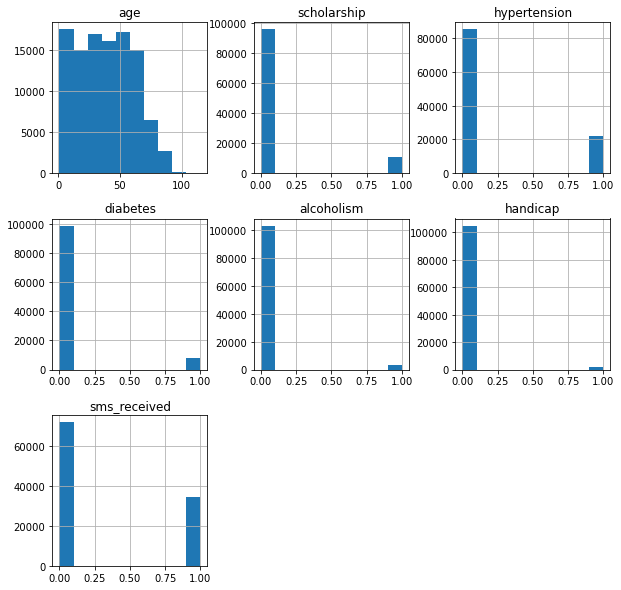

In [42]:
df.hist(figsize=(10,10));

#### Exploring the most important variable, whether the patient show-up or no-show to the appointment

In [43]:
df.no_show.value_counts()

No     85149
Yes    21639
Name: no_show, dtype: int64

In [44]:
total_patient_num = df.shape[0]
num_attendants = df.no_show.value_counts()["No"]
num_absents = df.no_show.value_counts()["Yes"]

,Absent
No,85149
Yes,21639


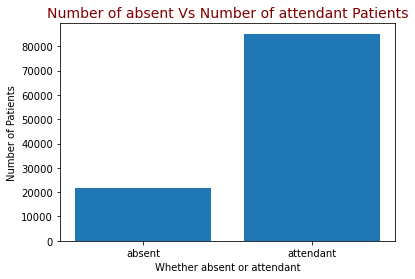

In [45]:
plt.bar(["absent","attendant"],[num_absents, num_attendants])
plt.xlabel("Whether absent or attendant")
plt.ylabel("Number of Patients")
plt.title("Number of absent Vs Number of attendant Patients", color="maroon", fontsize=14);
df.no_show.value_counts().to_frame("Absent")

In [46]:
perc_attendants = (num_attendants / total_patient_num)*100
perc_absents = (num_absents / total_patient_num)*100

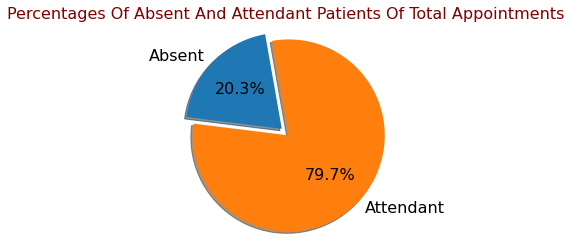

,Absent,Attendant
Percentages,20.263513,79.736487


In [47]:
labels = "Absent","Attendant"
sizes = [perc_absents, perc_attendants]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Absent')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of absent and attendant patients of total appointments".title(), color="maroon", fontsize=16)
plt.show()
pd.DataFrame([{"Absent":perc_absents, "Attendant":perc_attendants}], index=["Percentages"])

* About 20% of total appointments patients were absent.

### Research Question 1 (To what extent is the patient gender correlated to no-show?)

In [48]:
df.gender.value_counts()

F    70009
M    36779
Name: gender, dtype: int64

In [49]:
num_females_total = df.gender.value_counts()["F"] # total number of females
num_males_total = df.gender.value_counts()["M"] # total number of males

In [50]:
df[absent].gender.value_counts()

F    14249
M     7390
Name: gender, dtype: int64

In [51]:
num_females_absent = df[absent].gender.value_counts()["F"] # number of absent females
num_males_absent = df[absent].gender.value_counts()["M"] # number of absent males

In [52]:
prop_females_absent = (num_females_absent/num_females_total)*100
prop_females_absent # proportion of absence in females

20.35309745889814

In [53]:
prop_males_absent = (num_males_absent/num_males_total)*100
prop_males_absent # proportion of absence in males

20.09298784632535

* Exploring number of absent males and females 
* Exploring proportion of absence in both males and females

,Males Proportion,Females Proportion
Percentages,20.092988,20.353097


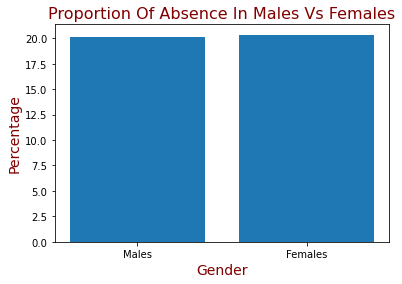

In [54]:
plt.bar(["Males", "Females"],[prop_males_absent, prop_females_absent])
plt.title("proportion of absence in males vs females".title(), color="maroon", fontsize=16)
plt.xlabel("Gender", color="maroon", fontsize=14)
plt.ylabel("Percentage", color="maroon", fontsize=14);
pd.DataFrame([{"Males Proportion":prop_males_absent, "Females Proportion":prop_females_absent}], index=["Percentages"])

* Proportions of absence in males and females are nearly the same.
* Gender seems to be not correlated with no-show

In [55]:
perc_females = (num_females_total/total_patient_num)*100 # percentages of female patients of total appointments
perc_males = 100 - perc_females # percentages of male patients of total appointments

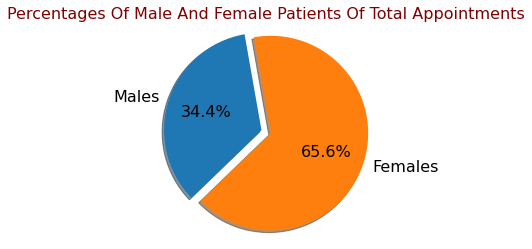

,Males Percentage,Females Percentage
Percentages,34.441136,65.558864


In [56]:
labels = "Males","Females"
sizes = [perc_males, perc_females]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Males')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of male and female patients of total appointments".title(), color="maroon", fontsize=16)
plt.show()
pd.DataFrame([{"Males Percentage":perc_males, "Females Percentage":perc_females}], index=["Percentages"])

* Exploring general percentages of male and female patients of total appointments in the dataset
* **Interesting**: majority, actually two third, of appointments were made by females

### Research Question 2  (To what extent is the hospital location `(neighborhood)` correlated to no-show?)

In [57]:
# view column names
df.head(0)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


* Exploring neighborhood distribution

,number_of_appointments
unique_neighborhoods,
JARDIM CAMBURI,7586
MARIA ORTIZ,5563
RESISTÊNCIA,4224
JARDIM DA PENHA,3846
ITARARÉ,3405
...,...
ILHA DO BOI,35
ILHA DO FRADE,10
AEROPORTO,8


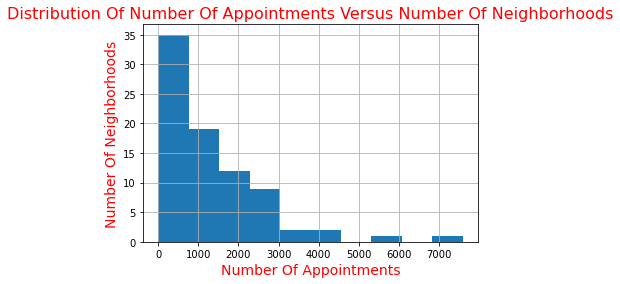

In [58]:
df.neighborhood.value_counts().hist()
plt.xlabel("Number Of Appointments", color="red", fontsize=14)
plt.ylabel("Number Of Neighborhoods", color="red", fontsize=14)
plt.title("Distribution Of Number Of Appointments Versus Number Of Neighborhoods", color="red", fontsize=16);
df.neighborhood.value_counts().describe().to_frame("neighborhoods_count_descriptive_stats")
df.neighborhood.value_counts().rename_axis('unique_neighborhoods').to_frame("number_of_appointments")

In [59]:
df.neighborhood.value_counts().describe().to_frame() # descriptive stats of neighborhood.value_counts() 

,neighborhood
count,81.000000
mean,1318.370370
std,1327.911937
min,1.000000
25%,393.000000
50%,825.000000
75%,1905.000000
max,7586.000000


* Most (75%) neighborhoods have less than 2000 appointments each.
* **Interesting**: that neighborhoods(JARDIM CAMBURI,MARIA ORTIZ and RESISTÊNCIA)have (7586, 5563, 4224) appointments respectively, which are far away from the median (825).                  

In [60]:
df[absent].neighborhood.value_counts().rename_axis('unique_neighborhoods').to_frame("number_of_absents")

,number_of_absents
unique_neighborhoods,
JARDIM CAMBURI,1432
MARIA ORTIZ,1194
ITARARÉ,896
RESISTÊNCIA,872
CENTRO,690
...,...
PONTAL DE CAMBURI,12
ILHA DO BOI,3
ILHAS OCEÂNICAS DE TRINDADE,2


* Exploring proportions of neighborhood absent(no show)

In [61]:
prop_neigh_absent =  df[absent].neighborhood.value_counts() / df.neighborhood.value_counts() *100
prop_neigh_absent.describe() # proportions of neighborhood absent(no show)

count     80.000000
mean      20.793888
std        9.528188
min        8.571429
25%       17.901078
50%       19.602662
75%       21.985583
max      100.000000
Name: neighborhood, dtype: float64

,percent_of_absence
unique_neighborhoods,
AEROPORTO,12.500000
ANDORINHAS,23.217550
ANTÔNIO HONÓRIO,17.509728
ARIOVALDO FAVALESSA,22.761194
BARRO VERMELHO,21.770335
...,...
SÃO JOSÉ,21.727468
SÃO PEDRO,21.192621
TABUAZEIRO,18.314532


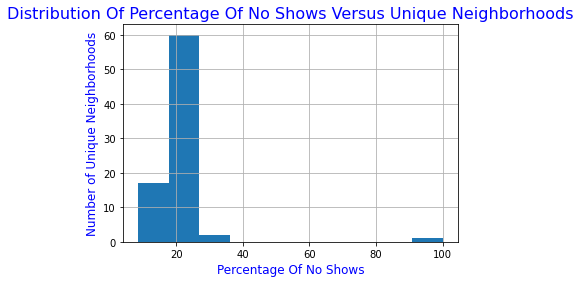

In [62]:
prop_neigh_absent.hist()
plt.xlabel("Percentage Of No Shows", color="b", fontsize=12)
plt.ylabel("Number of Unique Neighborhoods", color="b", fontsize=12)
plt.title("Distribution Of Percentage Of No Shows Versus Unique Neighborhoods", color="b", fontsize=16);
prop_neigh_absent.rename_axis('unique_neighborhoods').to_frame("percent_of_absence")

**Revisualize the above histogram by boxplot to clarify outliers.**

,percent_of_absence
unique_neighborhoods,
AEROPORTO,12.500000
ANDORINHAS,23.217550
ANTÔNIO HONÓRIO,17.509728
ARIOVALDO FAVALESSA,22.761194
BARRO VERMELHO,21.770335
...,...
SÃO JOSÉ,21.727468
SÃO PEDRO,21.192621
TABUAZEIRO,18.314532


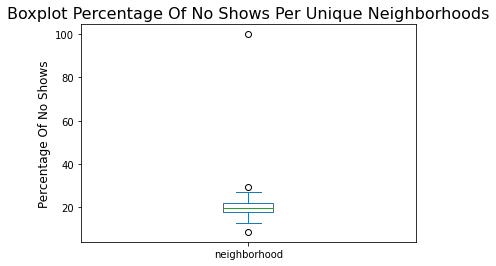

In [63]:
prop_neigh_absent.plot(kind="box");
plt.ylabel("Percentage Of No Shows", color="k", fontsize=12)
plt.title("Boxplot Percentage Of No Shows Per Unique Neighborhoods", color="k", fontsize=16);
prop_neigh_absent.rename_axis('unique_neighborhoods').to_frame("percent_of_absence")

* **Interesting**: we have an outlier here with 100% no show ,i.e., neighborhood 'ILHAS OCEÂNICAS DE TRINDADE'

In [64]:
prop_neigh_absent.idxmax()

'ILHAS OCEÂNICAS DE TRINDADE'

In [65]:
df[df["neighborhood"] == "ILHAS OCEÂNICAS DE TRINDADE"]

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
48754,F,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes
48765,F,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes


### Research Question 3  (To what extent is the enrollment in Brazilian welfare program `(scholarship)` correlated to no-show?

In [66]:
df.scholarship.value_counts()

0    95997
1    10791
Name: scholarship, dtype: int64

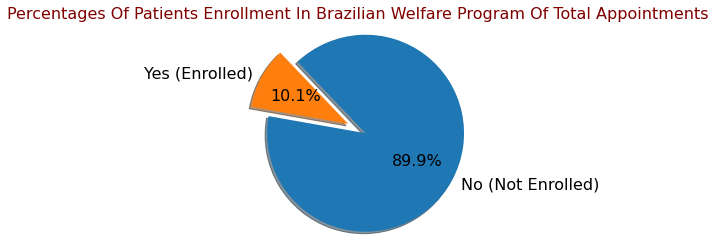

,total_count
Not enrolled,95997
Enrolled,10791


In [67]:
labels = "No (Not Enrolled)","Yes (Enrolled)"
sizes = [95997, 10791]
explode = (0.2, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=170, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of patients enrollment in Brazilian welfare program of total appointments".title(), color="maroon", fontsize=16)
plt.show()
df.scholarship.value_counts().to_frame("total_count").rename(index={0:"Not enrolled",1:"Enrolled"})

In [68]:
df[absent].scholarship.value_counts()

0    19069
1     2570
Name: scholarship, dtype: int64

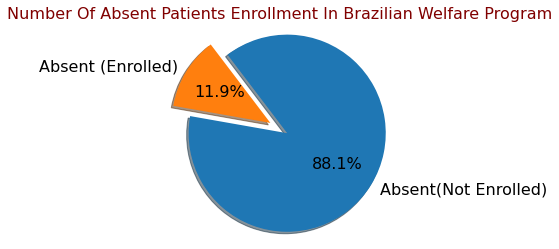

,absent_count
Not enrolled,19069
Enrolled,2570


In [69]:
labels = "Absent(Not Enrolled)","Absent (Enrolled)"
sizes = [19069, 2570]
explode = (0.2, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=170, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of absent patients enrollment in Brazilian welfare program".title(), color="maroon", fontsize=16)
plt.show()
df[absent].scholarship.value_counts().to_frame("absent_count").rename(index={0:"Not enrolled",1:"Enrolled"})

* More than 88% of no shows are `Not Enrolled` in Brazilian welfare program

### Research Question 4  (To what extent is the comorbid disease `(hypertension)` correlated to no-show?)

In [70]:
df.hypertension.value_counts()

0    85072
1    21716
Name: hypertension, dtype: int64

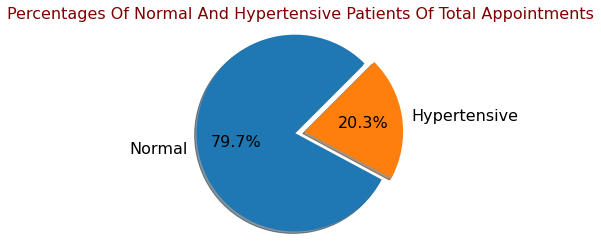

,total_count
Normal,85072
Hypertensive,21716


In [71]:
labels = "Normal","Hypertensive"
sizes = [85072, 21716]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of normal and hypertensive patients of total appointments".title(), color="maroon", fontsize=16)
plt.show()
df.hypertension.value_counts().to_frame("total_count").rename(index={0:"Normal",1:"Hypertensive"})

In [72]:
df[absent].hypertension.value_counts()

0    17891
1     3748
Name: hypertension, dtype: int64

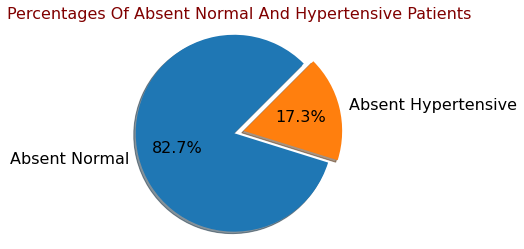

,absent_count
Normal,17891
Hypertensive,3748


In [73]:
labels = "Absent Normal","Absent Hypertensive"
sizes = [17891, 3748]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of absent normal and hypertensive patients".title(), color="maroon", fontsize=16)
plt.show()
df[absent].hypertension.value_counts().to_frame("absent_count").rename(index={0:"Normal",1:"Hypertensive"})

* More than 82% of no-shows are `Not hypertensive`.

### Research Question 5  (To what extent is the comorbid disease `(diabetes)` correlated to no-show?)

In [74]:
df.diabetes.value_counts()

0    98888
1     7900
Name: diabetes, dtype: int64

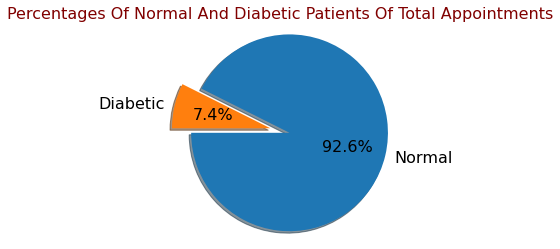

,total_count
Normal,98888
Diabetic,7900


In [75]:
labels = "Normal","Diabetic"
sizes = [98888, 7900]
explode = (0, 0.2)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of normal and diabetic patients of total appointments".title(), color="maroon", fontsize=16)
plt.show()
df.diabetes.value_counts().to_frame("total_count").rename(index={0:"Normal",1:"Diabetic"})

In [76]:
df[absent].diabetes.value_counts()

0    20217
1     1422
Name: diabetes, dtype: int64

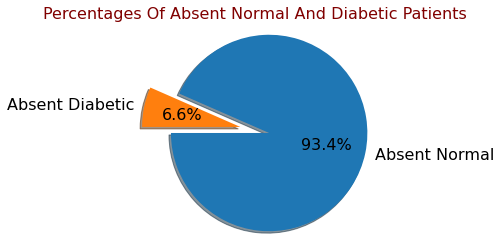

,absent_count
Normal,20217
Diabetic,1422


In [77]:
labels = "Absent Normal","Absent Diabetic"
sizes = [20217, 1422]
explode = (0.3, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of absent normal and diabetic patients".title(), color="maroon", fontsize=16)
plt.show()
df[absent].diabetes.value_counts().to_frame("absent_count").rename(index={0:"Normal",1:"Diabetic"})

* More than 93% of no-shows are `Not diabetic`.

### Research Question 6  (To what extent is the comorbid `alcoholism` correlated to no-show?)

In [78]:
df.alcoholism.value_counts()

0    103436
1      3352
Name: alcoholism, dtype: int64

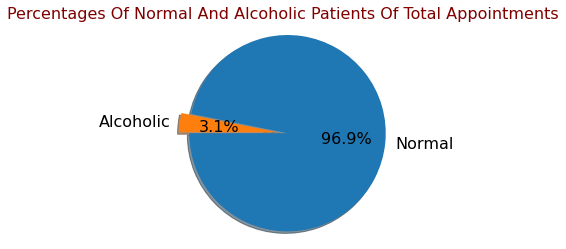

,total_count
Normal,103436
Alcoholic,3352


In [79]:
labels = "Normal","Alcoholic"
sizes = [103436, 3352]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of normal and alcoholic patients of total appointments".title(), color="maroon", fontsize=16)
plt.show()
df.alcoholism.value_counts().to_frame("total_count").rename(index={0:"Normal",1:"Alcoholic"})

In [80]:
df[absent].alcoholism.value_counts()

0    20964
1      675
Name: alcoholism, dtype: int64

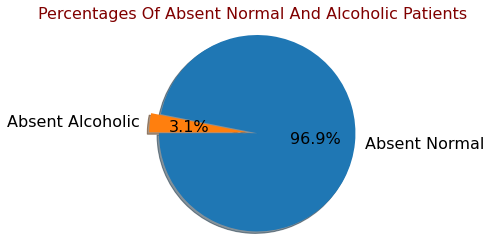

,absent_count
Normal,20964
Alcoholic,675


In [81]:
labels = "Absent Normal","Absent Alcoholic"
sizes = [20964, 675]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("percentages of absent normal and alcoholic patients".title(), color="maroon", fontsize=16)
plt.show()
df[absent].alcoholism.value_counts().to_frame("absent_count").rename(index={0:"Normal",1:"Alcoholic"})

* About 97% of no shows are `Not alcoholic`.

### Research Question 7  (To what extent is receiving all the instructions `(sms received)` correlated to no-show?)

In [82]:
df.sms_received.value_counts()

0    72250
1    34538
Name: sms_received, dtype: int64

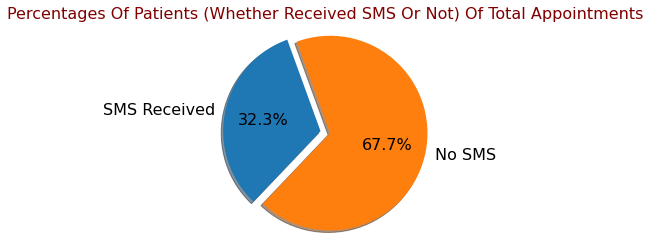

,total_count
No SMS,72250
SMS Received,34538


In [83]:
labels = "SMS Received","No SMS"
sizes = [34538, 72250]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=110, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentages Of Patients (Whether Received SMS Or Not) Of Total Appointments", color="maroon", fontsize=16)
plt.show()
df.sms_received.value_counts().to_frame("total_count").rename(index={0:"No SMS",1:"SMS Received"})

Exploring Percentages Of Patients Whether Received SMS (32.3%) Or Not (67.7%) Of Total Appointments

In [84]:
df[absent].sms_received.value_counts()

0    12080
1     9559
Name: sms_received, dtype: int64

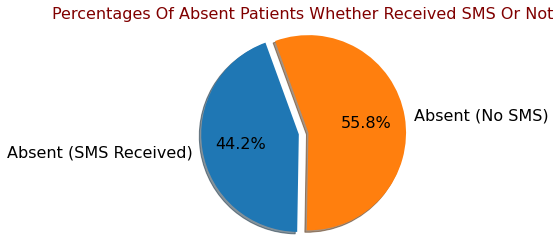

,absent_count
No SMS,12080
SMS Received,9559


In [85]:
labels = "Absent (SMS Received)","Absent (No SMS)"
sizes = [9559, 12080]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=110, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentages Of Absent Patients Whether Received SMS Or Not", color="maroon", fontsize=16)
plt.show()
df[absent].sms_received.value_counts().to_frame("absent_count").rename(index={0:"No SMS",1:"SMS Received"})


* About 44% of `no shows` did `Receive SMS`, versus, 32% of the `total` did `Receive SMS`
* Seems that `SMS's` did not increase attendence.


<a id='conclusions'></a>
## 4. Conclusions
I tried to figure out to what extent variables affect no-shows, based on the available data.

Taking into consideration all analysis limitations stated above in the introductory section, even strong association is not a proof of causation.


####  Findings:
As per the available dateset I found that:
* The minority of patients  of total appointments were absent.
* **`Research Question 1`** (To what extent is the patient gender correlated to no-show?)
 * Proportions of absence in males and females are nearly the same.
 * Gender seems to be not correlated with no-show
 * Interesting: majority of appointments were made by females. **why?**(need further investigation)

* **`Research Question 2`** (To what extent is the hospital location (neighborhood) correlated to no-show?)
 * Most neighborhoods have less than 2000 appointments each.
 * Interesting that neighborhoods `(JARDIM CAMBURI,MARIA ORTIZ and RESISTÊNCIA)` have (7586, 5563, 4224) appointments    respectively, which are far away from the median (825). **why?**(need further investigation)
 * Interesting: we have an outlier here with 100% no show ,i.e., neighborhood `ILHAS OCEÂNICAS DE TRINDADE`. **why?**(need further investigation)

* **`Research Question 3`** (To what extent is the enrollment in Brazilian welfare program (scholarship) correlated to no-show?
 * Majority of no shows are Not Enrolled in Brazilian welfare program.
 * Enrollment in Brazilian welfare program may be not correlated to no-show.

* **`Research Question 4`** (To what extent is the comorbid disease (hypertension) correlated to no-show?)
 * Majority of no-shows are Not hypertensive.
 * Hypertension may be not correlated to no-show.

* **`Research Question 5`** (To what extent is the comorbid disease (diabetes) correlated to no-show?)
 * Majority of no-shows are Not diabetic.
 * Diabetes may be not correlated to no-show.

* **`Research Question 6`** (To what extent is the comorbid alcoholism correlated to no-show?)
 * Majority of no shows are Not alcoholic.
 * Alcoholism may be not correlated to no-show.

* **`Research Question 7`** (To what extent is receiving all the instructions (sms received) correlated to no-show?)
 * Minority of no shows did Receive SMS.
 * Seems that SMS's did not increase attendence.
